In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../..')
from keras import losses, metrics
from tensorflow.keras import optimizers
import gp2
from gp2 import Runner

2023-04-25 21:23:22.252883: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPUs will likely run quickly with dtype policy mixed_float16 as they all have compute capability of at least 7.0


2023-04-25 21:23:23.854721: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-04-25 21:23:23.973020: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:0f:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-25 21:23:23.975588: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-25 21:23:23.978121: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 2 with properties: 
pciBusID: 0000:4e:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-25 21:23:23.98

In [3]:
help(gp2.KUNetPlus2D)

Help on class KUNetPlus2D in module gp2.classifiers.k_unet_plus2d:

class KUNetPlus2D(gp2.classifiers.base_keras_segmentation_classifier.BaseKerasSegmentationClassifier)
 |  KUNetPlus2D(input_size=(512, 512, 1), filter_num=None, n_labels=1, stack_num_down=3, stack_num_up=3, activation='ReLU', output_activation='Sigmoid', batch_norm=True, pool=True, unpool=True, deep_supervision=False, backbone=None, weights='imagenet', freeze_backbone=True, freeze_batch_norm=True, name='xnet', optimizer=None, loss=None, metric=None, verbose=False, workingdir='/tmp')
 |  
 |  Keras U-net++ 2D model.
 |  
 |  Method resolution order:
 |      KUNetPlus2D
 |      gp2.classifiers.base_keras_segmentation_classifier.BaseKerasSegmentationClassifier
 |      gp2.classifiers.classifier.Classifier
 |      abc.ABC
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, input_size=(512, 512, 1), filter_num=None, n_labels=1, stack_num_down=3, stack_num_up=3, activation='ReLU', output_activation

In [4]:
R = Runner(verbose=True, 
           classifier='kunetplus2d',
           discriminator='cnnplus',
           filter_num= [16, 32, 64, 128, 256, 512, 1024],
           stack_num_down=3, 
           stack_num_up=3, 
           activation='ReLU', 
           output_activation='Sigmoid', 
           batch_norm=True, 
           pool=True, 
           unpool=True, 
           deep_supervision=False,
           weights=None, 
           freeze_backbone=True, 
           freeze_batch_norm=True,
           optimizer=None, 
           loss=gp2.Util.hybrid_loss, 
           metric=None           
          )

2023-04-25 21:23:26.414621: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-25 21:23:26.972645: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:0f:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-25 21:23:26.975047: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-25 21:23:26.977401: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 2 

*** GP2  KUNetPlus2D ***
Working directory: /tmp/tmp33962_jfGP2
Verbose mode active!
{'verbose': True, 'workingdir': '/tmp/tmp33962_jfGP2', 'input_size': (512, 512, 1), 'filter_num': [16, 32, 64, 128, 256, 512, 1024], 'n_labels': 1, 'stack_num_down': 3, 'stack_num_up': 3, 'activation': 'ReLU', 'output_activation': 'Sigmoid', 'batch_norm': True, 'pool': True, 'unpool': True, 'deep_supervision': False, 'backbone': None, 'weights': 'imagenet', 'freeze_backbone': True, 'freeze_batch_norm': True, 'name': 'xnet', 'optimizer': <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7f2364598df0>, 'loss': <tensorflow.python.eager.def_function.Function object at 0x7f236c5dcbb0>, 'metric': [<tensorflow.python.eager.def_function.Function object at 0x7f236c5dc880>], 'model': <tensorflow.python.keras.engine.functional.Functional object at 0x7f22b44c0880>}
Model summary:
Model: "xnet_model"
_________________________________________________________________
Layer (type)                 Output Shap

In [5]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/masks.npy')

In [6]:
images = images[:5000]
masks = masks[:5000]

In [7]:
images.shape

(5000, 512, 512, 1)

In [8]:
masks.shape

(5000, 512, 512, 1)

In [9]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [ ]:
R.run(images=images, masks=masks, weights=weights, runs=7)     

Weights OK!
******
Loop 0


2023-04-25 21:23:39.835496: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-04-25 21:23:39.854994: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245755000 Hz


Epoch 1/100


2023-04-25 21:23:44.338987: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-04-25 21:23:44.993107: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-04-25 21:23:45.699146: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-04-25 21:23:45.699170: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-04-25 21:23:45.699227: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-04-25 21:23:45.714960: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-04-25 21:23:46.424862: I tensorflow/stream_exec

4/4 [==============================] - 37s 6s/step - loss: 1.7950 - dice_coef: 0.1568 - val_loss: 1.7861 - val_dice_coef: 0.1632


2023-04-25 21:24:21.237808: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [ ]:
R.plot()

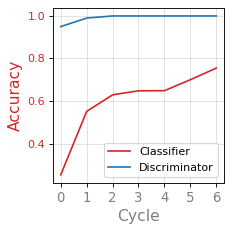

In [11]:
R.plot()